# Data Science Intern @Lets Grow More

Author: Nikita Kumbhar.

Task 1 : Iris Flower Classification ML Project | Dataset : http://archive.ics.uci.edu/ml/datasets/Iris

# Importing library :

In [1]:

import pandas as pd
import numpy as np
import scipy.stats as st
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm

# Data Reading

In [2]:
iris=pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**These are the different columns present in this data set.**

In [4]:
iris.shape

(150, 5)

**In this dataset 150 rows and 5 columns are present.**

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**we see all information of the dataset.**

In [6]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**There is no missing value present in dataset.**

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Interpretation:
   on an average(mean) of sepal_length is 5.84 ,petal_length is 3.75 ,sepal_width is 3.05 and petal_width is 1.19.
   Minimum sepal_length is 4.3 and maximum is 7.9.
   Minimum petal_length is 1 and maximum is 6.9
   Minimum sepal_width is 2 and maximum is 4.4
   Minimum petal_width is 0.1 and maximum is 2.5.
   

In [8]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Interpretation:
1st check correlation between variables.
Here sepal_length is highly positive correlated with petal_length and patel_width i.e 0.82.
sepal_width is less negative correlated with patel_length and petal_width.

In [9]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# **Interpretation:**
In this data set have 3 class and every one has 50 records.

# scatter plot

In [11]:

colors=['red','orange','blue']
Species=['setosa', 'versicolor', 'virginica']

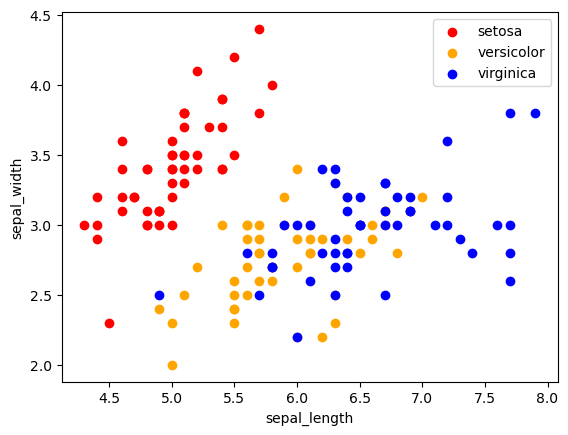

In [12]:
for i in range(3):
    x=iris[iris['species']==Species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=Species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

# Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
iris['species']=le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [15]:
from sklearn.model_selection import train_test_split
#train=70
#test=30
x=iris.drop(columns=['species'])
y=iris['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Simple Linear Regression

In [16]:
model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

score_model = round(model.score(x_test, y_test) * 100,2)

sc_lr = print('Accuracy:',model.score(x_test, y_test) * 100)

Accuracy: 92.74038144197286


# Logistic regression

In [17]:

from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [18]:
model2.fit(x_train, y_train)

LogisticRegression()

In [19]:
# print matrix to get performance
score_model2 = round(model2.score(x_test, y_test) * 100,2)
sc_logr=print('Accuracy:',model2.score(x_test,y_test)*100)

Accuracy: 100.0


# GaussianNB

In [20]:
model3= GaussianNB()

model3.fit(x_train,y_train)

y_pred_model3 = model3.predict(x_test)

score_model3 = round(accuracy_score(y_pred_model3,y_test)*100,2)

sc_nb=print("Accuracy: "+str(score_model3)+" %")

Accuracy: 100.0 %


# DECISION TREE CLASSIFIER


In [21]:
model4 = DecisionTreeClassifier()

model4.fit(x_train, y_train)

sc_model4= round(model4.score(x_test, y_test) * 100 , 2)

sc_dt=print("Accuracy: ", str(sc_model4) , "%")

Accuracy:  100.0 %


# Support Vector Machine

In [22]:
model5 = svm.SVC(kernel='linear')

model5.fit(x_train, y_train)

y_pred_model5 = model5.predict(x_test)

sc_model5 = round(accuracy_score(y_pred_model5,y_test)*100,2)

sc_svm=print("Accuracy: "+ str(sc_model5) +" %")

Accuracy: 100.0 %


# comparison


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

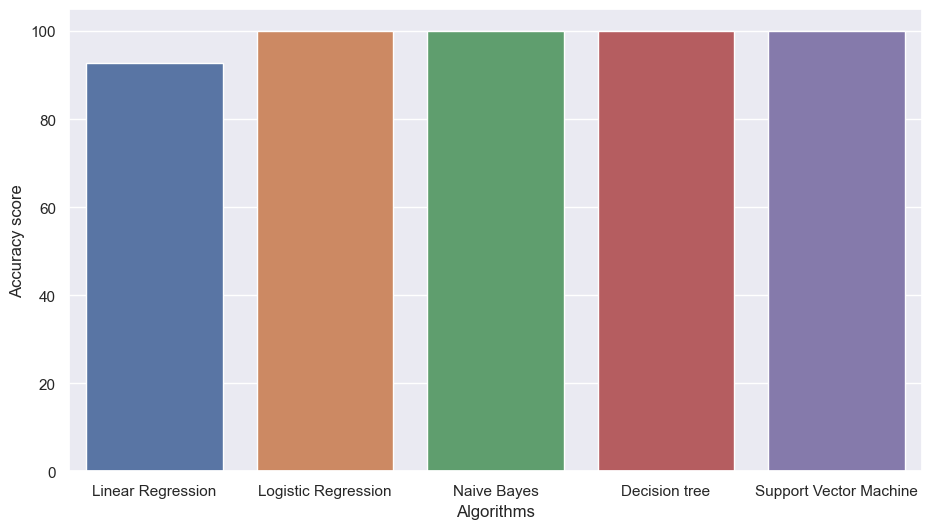

In [23]:
scores_plt = [score_model , score_model2 , score_model3, sc_model4, sc_model5]
algorithms = ["Linear Regression","Logistic Regression","Naive Bayes","Decision tree","Support Vector Machine"]
sns.set(rc={'figure.figsize':(11,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores_plt)

# Interpretation:
On the above plot we see Logistic Regression and Navive Bayes Algorithms has same and higest accuracy.